In [1]:
import os
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from ParseNHANES import ParseNHANES, Component


import seaborn as sns
%matplotlib inline
import matplotlib as mpl

seed=301

from datetime import datetime


In [2]:
def multi_merge(data_frames):
    return reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'year'], how='outer'), data_frames)

In [3]:
nhanes = ParseNHANES(data_dir="C:/Users/poorn/OneDrive", out_dir='data')

# Demographics

In [4]:
cols_demo = ['RIDAGEYR', 'RIDRETH1', 'INDFMPIR', 'RIAGENDR']

In [5]:
df_demo, meta_demo = nhanes.get_component(Component.DEMOGRAPHICS, columns=cols_demo)

2020-10-18 23:14:24 [ParseNHANES] INFO: Getting Component.DEMOGRAPHICS


In [6]:
meta_demo # these are the columns in the df

{'RIDAGEYR': 'Age in years at screening ',
 'RIDRETH1': 'Race/Hispanic origin',
 'INDFMPIR': 'Ratio of family income to poverty',
 'RIAGENDR': 'Gender'}

In [7]:
df_demo.head()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,year,SEQN
0,2.0,4.0,0.86,2.0,1999-2000,1
1,77.0,3.0,5.00,1.0,1999-2000,2
2,10.0,3.0,1.47,2.0,1999-2000,3
3,1.0,4.0,0.57,1.0,1999-2000,4
4,49.0,3.0,5.00,1.0,1999-2000,5


In [8]:
df_demo.describe()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,SEQN
count,1.013160e+05,101316.000000,9.212000e+04,101316.000000,101316.000000
mean,3.112829e+01,2.895831,2.272155e+00,1.507551,51134.397193
std,2.494308e+01,1.251255,1.601358e+00,0.499945,29836.192620
min,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000
25%,1.000000e+01,2.000000,9.400000e-01,1.000000,25329.750000
50%,2.400000e+01,3.000000,1.790000e+00,2.000000,50658.500000
75%,5.200000e+01,4.000000,3.570000e+00,2.000000,77627.250000
max,8.500000e+01,5.000000,5.000000e+00,2.000000,102956.000000


In [9]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 9253
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RIDAGEYR  101316 non-null  float64
 1   RIDRETH1  101316 non-null  float64
 2   INDFMPIR  92120 non-null   float64
 3   RIAGENDR  101316 non-null  float64
 4   year      101316 non-null  object 
 5   SEQN      101316 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 5.0+ MB


In [10]:
df_demo['year'].value_counts().sort_index()
# approx 10,000 people per year

1999-2000     9965
2001-2002    11039
2003-2004    10122
2005-2006    10348
2007-2008    10149
2009-2010    10537
2011-2012     9756
2013-2014    10175
2015-2016     9971
2017-2018     9254
Name: year, dtype: int64

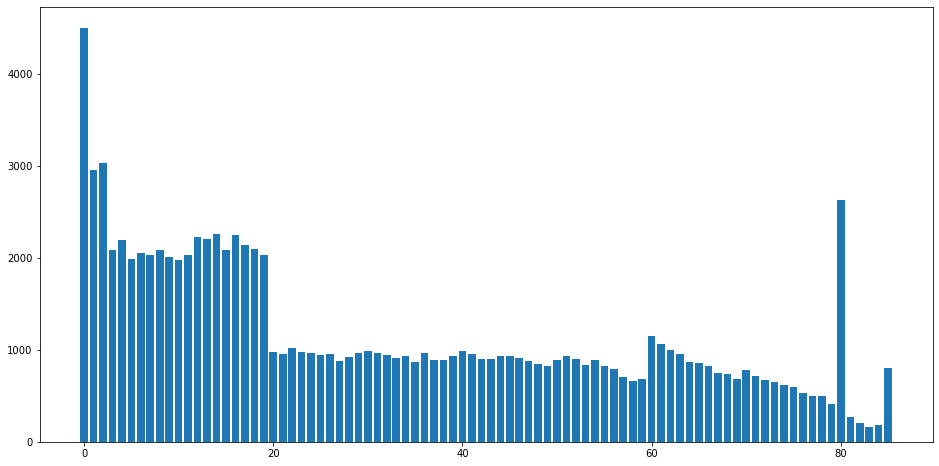

In [11]:
ages = df_demo['RIDAGEYR'].astype(int).value_counts().sort_index()

# plot ages of all people
fig = plt.figure(figsize=(16, 8))
plt.bar(ages.index, ages)
plt.show()  # lots of 80 year olds??

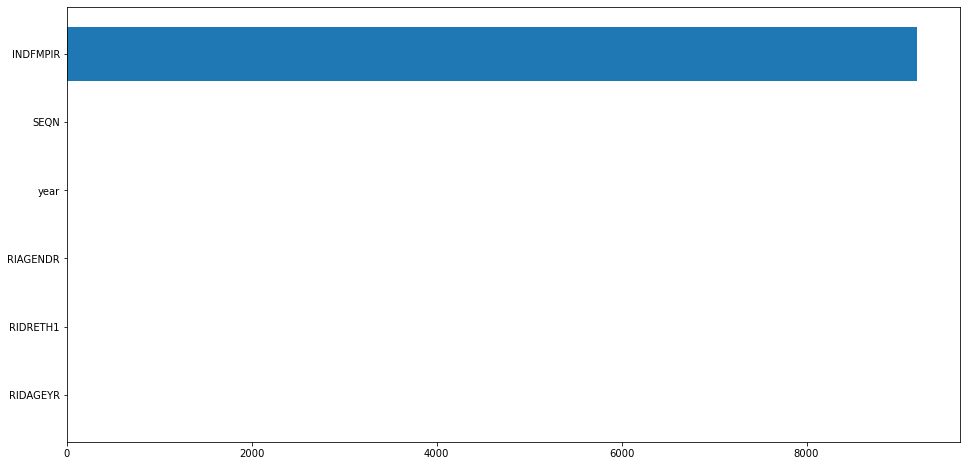

In [12]:
na_count = df_demo.isna().sum().sort_values()

# plot ages of all people
fig = plt.figure(figsize=(16, 8))
plt.barh(na_count.index, na_count)
plt.show()  # lots of 80 year olds??

In [13]:
# 1: male
# 2: female
df_demo['RIAGENDR'].value_counts()

2.0    51423
1.0    49893
Name: RIAGENDR, dtype: int64

# Questionaire

In [14]:
cols_ques1 = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F']
cols_ques2 = ['SMQ040']
cols_ques3 = ['DIQ010']

In [15]:
df_ques1, meta_ques1 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'MCQ(|_[A-Z]).XPT', columns=cols_ques1)

2020-10-18 23:14:32 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [16]:
df_ques2, meta_ques2 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'SMQ(|_[A-Z]).XPT', columns=cols_ques2)

2020-10-18 23:14:44 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [17]:
df_ques3, meta_ques3 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'DIQ(|_[A-Z]).XPT', columns=cols_ques3)

2020-10-18 23:14:48 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [18]:
df_ques4, meta_ques4 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'ALQ(|_[A-Z]).XPT', columns=['ALQ120Q'])

2020-10-18 23:14:51 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [19]:
meta_ques = {**meta_ques1, **meta_ques2, **meta_ques3, **meta_ques4}
meta_ques

{'MCQ160B': 'Ever told had congestive heart failure',
 'MCQ160C': 'Ever told you had coronary heart disease',
 'MCQ160D': 'Ever told you had angina/angina pectoris',
 'MCQ160E': 'Ever told you had heart attack',
 'MCQ160F': 'Ever told you had a stroke',
 'SMQ040': 'Do you now smoke cigarettes?',
 'DIQ010': 'Doctor told you have diabetes',
 'ALQ120Q': 'How often drink alcohol over past 12 mos'}

In [20]:
df_ques1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96811 entries, 0 to 8896
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MCQ160B  55078 non-null  float64
 1   MCQ160C  55078 non-null  float64
 2   MCQ160D  55078 non-null  float64
 3   MCQ160E  55078 non-null  float64
 4   MCQ160F  55078 non-null  float64
 5   year     96811 non-null  object 
 6   SEQN     96811 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 5.5+ MB


In [21]:
df_ques = multi_merge(data_frames=[df_ques1, df_ques2, df_ques3, df_ques4])
df_ques.head()

,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,year,SEQN,SMQ040,DIQ010,ALQ120Q
0,NaN,NaN,NaN,NaN,NaN,1999-2000,1,NaN,2.0,NaN
1,2.0,2.0,2.0,2.0,2.0,1999-2000,2,NaN,2.0,24.0
2,NaN,NaN,NaN,NaN,NaN,1999-2000,3,NaN,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN,1999-2000,4,NaN,2.0,NaN
4,2.0,2.0,2.0,2.0,2.0,1999-2000,5,3.0,2.0,4.0


In [22]:
df_na = df_ques.isna()
df_na['year'] = df_ques['year']
df_na_year = df_na.groupby('year').sum()
df_na_year.T

year,1999-2000,2001-2002,2003-2004,2005-2006,2007-2008,2009-2010,2011-2012,2013-2014,2015-2016,2017-2018
MCQ160B,4613.0,5060.0,4605.0,4843.0,3731.0,3891.0,3805.0,4001.0,3856.0,3328.0
MCQ160C,4613.0,5060.0,4605.0,4843.0,3731.0,3891.0,3805.0,4001.0,3856.0,3328.0
MCQ160D,4613.0,5060.0,4605.0,4843.0,3731.0,3891.0,3805.0,4001.0,3856.0,3328.0
MCQ160E,4613.0,5060.0,4605.0,4843.0,3731.0,3891.0,3805.0,4001.0,3856.0,3328.0
MCQ160F,4613.0,5060.0,4605.0,4843.0,3731.0,3891.0,3805.0,4001.0,3856.0,3328.0
SEQN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SMQ040,7194.0,7874.0,7149.0,7474.0,6864.0,7243.0,6995.0,7191.0,7153.0,6538.0
DIQ010,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
ALQ120Q,5974.0,6574.0,5966.0,6075.0,5232.0,5457.0,5176.0,5291.0,5351.0,8897.0


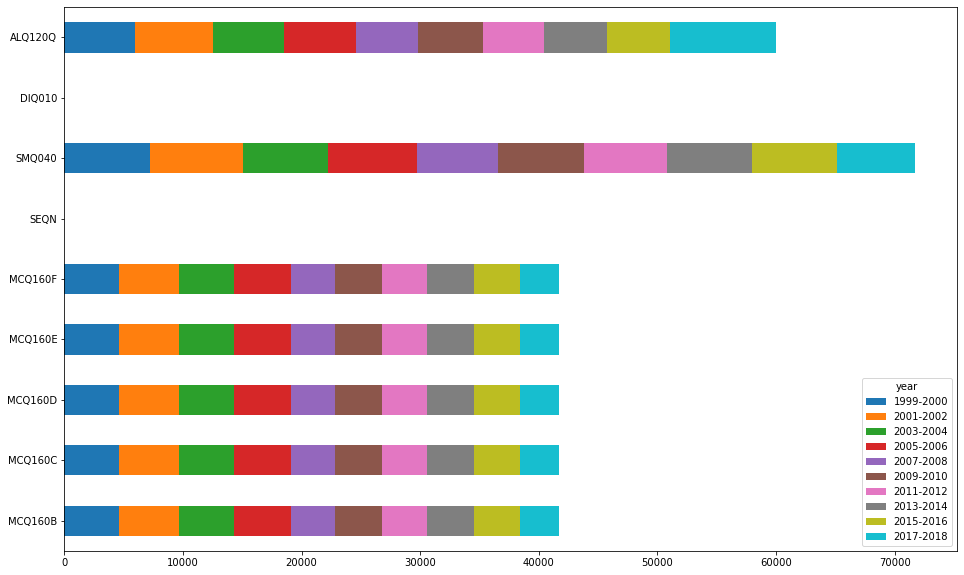

In [23]:
df_na_year.T.plot.barh(stacked=True, figsize=(16, 10))

In [24]:
df_ques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96811 entries, 0 to 96810
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MCQ160B  55078 non-null  float64
 1   MCQ160C  55078 non-null  float64
 2   MCQ160D  55078 non-null  float64
 3   MCQ160E  55078 non-null  float64
 4   MCQ160F  55078 non-null  float64
 5   year     96811 non-null  object 
 6   SEQN     96811 non-null  int32  
 7   SMQ040   25136 non-null  float64
 8   DIQ010   96802 non-null  float64
 9   ALQ120Q  36818 non-null  float64
dtypes: float64(8), int32(1), object(1)
memory usage: 7.8+ MB


In [25]:
df_ques['SEQN'].nunique()

96811

# Laboratory

In [26]:
cols_labo = ['LBXSNASI', 'LBXSCH']

In [27]:
df_labo, meta_labo = nhanes.get_component(Component.LABORATORY, expr=r'(BIOPRO_[A-Z]|L40_.*|LAB18).XPT', columns=cols_labo)

2020-10-18 23:14:53 [ParseNHANES] INFO: Getting Component.LABORATORY


In [28]:
meta_labo

{'LBXSNASI': 'Sodium (mmol/L)',
 'LBXSCH': 'Cholesterol, refrigerated serum (mg/dL)'}

In [29]:
df_labo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69678 entries, 0 to 6400
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSNASI  63969 non-null  float64
 1   LBXSCH    63965 non-null  float64
 2   year      69678 non-null  object 
 3   SEQN      69678 non-null  int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 2.4+ MB


In [30]:
df_labo.head()

,LBXSNASI,LBXSCH,year,SEQN
0,144.1,203.0,1999-2000,2
1,137.5,277.0,1999-2000,5
2,139.9,148.0,1999-2000,6
3,143.2,244.0,1999-2000,7
4,136.8,157.0,1999-2000,8


# Examination

In [31]:
cols_exam1 = ['BPXPLS', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4']
cols_exam2 = ['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXARMC']

In [32]:
df_exam1, meta_exam1 = nhanes.get_component(Component.EXAMINATION, expr=r'BPX(|_[A-Z]).XPT', columns=cols_exam1)

2020-10-18 23:14:57 [ParseNHANES] INFO: Getting Component.EXAMINATION


In [33]:
df_exam2, meta_exam2 = nhanes.get_component(Component.EXAMINATION, expr=r'BMX(|_[A-Z]).XPT', columns=cols_exam2)

2020-10-18 23:14:59 [ParseNHANES] INFO: Getting Component.EXAMINATION


In [34]:
meta_exam = {**meta_exam1, **meta_exam2}
meta_exam

{'BPXPLS': '60 sec. pulse (30 sec. pulse * 2)',
 'BPXSY1': 'Systolic: Blood pres (1st rdg) mm Hg',
 'BPXDI1': 'Diastolic: Blood pres (1st rdg) mm Hg',
 'BPXSY2': 'Systolic: Blood pres (2nd rdg) mm Hg',
 'BPXDI2': 'Diastolic: Blood pres (2nd rdg) mm Hg',
 'BPXSY3': 'Systolic: Blood pres (3rd rdg) mm Hg',
 'BPXDI3': 'Diastolic: Blood pres (3rd rdg) mm Hg',
 'BPXSY4': 'Systolic: Blood pres (4th rdg) mm Hg',
 'BPXDI4': 'Diastolic: Blood pres (4th rdg) mm Hg',
 'BMXWT': 'Weight (kg)',
 'BMXHT': 'Standing Height (cm)',
 'BMXWAIST': 'Waist Circumference (cm)',
 'BMXARMC': 'Arm Circumference (cm)'}

In [35]:
df_exam = multi_merge([df_exam1, df_exam2])

In [36]:
df_exam.head()

,BPXPLS,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BPXSY4,BPXDI4,year,SEQN,BMXWT,BMXHT,BMXWAIST,BMXARMC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-2000,1,12.5,91.6,45.7,15.2
1,68.0,106.0,58.0,98.0,56.0,98.0,56.0,NaN,NaN,1999-2000,2,75.4,174.0,98.0,29.8
2,104.0,110.0,60.0,104.0,64.0,112.0,62.0,NaN,NaN,1999-2000,3,32.9,136.6,64.7,19.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-2000,4,13.3,NaN,NaN,16.4
4,66.0,122.0,82.0,122.0,84.0,122.0,82.0,NaN,NaN,1999-2000,5,92.5,178.3,99.9,35.8


In [37]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96766 entries, 0 to 96765
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPXPLS    73876 non-null  float64
 1   BPXSY1    68576 non-null  float64
 2   BPXDI1    68576 non-null  float64
 3   BPXSY2    67934 non-null  float64
 4   BPXDI2    67934 non-null  float64
 5   BPXSY3    67328 non-null  float64
 6   BPXDI3    67327 non-null  float64
 7   BPXSY4    8466 non-null   float64
 8   BPXDI4    8466 non-null   float64
 9   year      96766 non-null  object 
 10  SEQN      96766 non-null  int32  
 11  BMXWT     95182 non-null  float64
 12  BMXHT     88239 non-null  float64
 13  BMXWAIST  84699 non-null  float64
 14  BMXARMC   91790 non-null  float64
dtypes: float64(13), int32(1), object(1)
memory usage: 11.4+ MB



# Merge Components

In [38]:
df_merged = multi_merge(data_frames=[df_demo, df_exam, df_ques, df_labo])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101862 entries, 0 to 101861
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RIDAGEYR  101862 non-null  float64
 1   RIDRETH1  101862 non-null  float64
 2   INDFMPIR  92636 non-null   float64
 3   RIAGENDR  101862 non-null  float64
 4   year      101862 non-null  object 
 5   SEQN      101862 non-null  int32  
 6   BPXPLS    74418 non-null   float64
 7   BPXSY1    69081 non-null   float64
 8   BPXDI1    69081 non-null   float64
 9   BPXSY2    68425 non-null   float64
 10  BPXDI2    68425 non-null   float64
 11  BPXSY3    67802 non-null   float64
 12  BPXDI3    67801 non-null   float64
 13  BPXSY4    8568 non-null    float64
 14  BPXDI4    8568 non-null    float64
 15  BMXWT     95718 non-null   float64
 16  BMXHT     88783 non-null   float64
 17  BMXWAIST  85237 non-null   float64
 18  BMXARMC   92332 non-null   float64
 19  MCQ160B   55529 non-null   float64
 20  MCQ1

In [39]:
df_merged.set_index('SEQN', inplace=True)

In [40]:
# Replace numeric categorical values with text
df_merged['SMQ040'].replace({1: 'Every day',
                             2: 'Some days',
                             3: 'Not at all',
                             7: 'Refused',
                             9: "Don't know"}, inplace=True)
df_merged['RIDRETH1'].replace({1: "Mexican American",
                               2: "Other Hispanic",
                               3: "Non-Hispanic White",
                               4: "Non-Hispanic Black",
                               5: "Other Race - Including Multi-Racial"}, inplace=True)

df_merged['RIAGENDR'].replace({1: "Male", 2: "Female"}, inplace=True)
df_merged['MCQ160B'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160F'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160D'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160C'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160E'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['DIQ010'].replace({1: "Yes", 2: "No", 3: "Borderline", 7: "Refused", 9: "Don't know"}, inplace=True)

In [41]:
cols_BPXSY = ['BPXSY' + str(x) for x in range(1, 5)]
cols_BPXDI = ['BPXDI' + str(x) for x in range(1, 5)]
cols_BPXDI + cols_BPXSY

['BPXDI1',
 'BPXDI2',
 'BPXDI3',
 'BPXDI4',
 'BPXSY1',
 'BPXSY2',
 'BPXSY3',
 'BPXSY4']

In [42]:
def average_blood_pressure(row, typ):
    if typ.lower() == 'systolic':
        cols = cols_BPXSY
    elif typ.lower() == 'diastolic':
        cols = cols_BPXDI
    else:
        raise ValueError()

    return row[cols].mean()

In [43]:
df_merged['avg_systolic_blood_pres'] = df_merged.apply(lambda row: average_blood_pressure(row, 'Systolic'), axis=1)
df_merged['avg_diastolic_blood_pres'] = df_merged.apply(lambda row: average_blood_pressure(row, 'Diastolic'), axis=1)

In [44]:
cols_drop = cols_BPXSY + cols_BPXDI
df_merged.drop(labels=cols_drop, axis=1, inplace=True)

In [45]:
df_merged.head()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,year,BPXPLS,BMXWT,BMXHT,BMXWAIST,BMXARMC,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,SMQ040,DIQ010,ALQ120Q,LBXSNASI,LBXSCH,avg_systolic_blood_pres,avg_diastolic_blood_pres
SEQN,,,,,,,,,,,,,,,,,,,,,,
1,2.0,Non-Hispanic Black,0.86,Female,1999-2000,NaN,12.5,91.6,45.7,15.2,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,NaN,No,24.0,144.1,203.0,100.666667,56.666667
3,10.0,Non-Hispanic White,1.47,Female,1999-2000,104.0,32.9,136.6,64.7,19.7,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,108.666667,62.000000
4,1.0,Non-Hispanic Black,0.57,Male,1999-2000,NaN,13.3,NaN,NaN,16.4,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667


In [46]:
#df_merged.dropna(subset=['MCQ160B','MCQ160C','MCQ160E', 'MCQ160F'])

In [47]:
df_na = df_merged.isna()
df_na['year'] = df_merged['year']
df_na_year = df_na.groupby('year').sum()
df_na_year

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,BPXPLS,BMXWT,BMXHT,BMXWAIST,BMXARMC,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,SMQ040,DIQ010,ALQ120Q,LBXSNASI,LBXSCH,avg_systolic_blood_pres,avg_diastolic_blood_pres
year,,,,,,,,,,,,,,,,,,,,,
1999-2000,0.0,0.0,1483.0,0.0,2712.0,768.0,1501.0,1681.0,980.0,5085.0,5085.0,5085.0,5085.0,5085.0,7666.0,477.0,6446.0,3735.0,3733.0,2750.0,2750.0
2001-2002,0.0,0.0,824.0,0.0,3146.0,1224.0,1678.0,1991.0,1175.0,5724.0,5724.0,5724.0,5724.0,5724.0,8769.0,571.0,7301.0,4694.0,4694.0,3207.0,3207.0
2003-2004,0.0,0.0,587.0,0.0,2761.0,593.0,1432.0,1725.0,935.0,5082.0,5082.0,5082.0,5082.0,5082.0,7626.0,477.0,6443.0,3631.0,3630.0,2908.0,2908.0
2005-2006,0.0,0.0,534.0,0.0,2907.0,501.0,1386.0,1676.0,854.0,5369.0,5369.0,5369.0,5369.0,5369.0,8000.0,526.0,6601.0,3914.0,3915.0,2989.0,2989.0
2007-2008,0.0,0.0,894.0,0.0,2788.0,518.0,1276.0,1611.0,868.0,4214.0,4214.0,4214.0,4214.0,4214.0,7347.0,483.0,5715.0,3774.0,3774.0,2799.0,2799.0
2009-2010,0.0,0.0,996.0,0.0,2701.0,375.0,1117.0,1564.0,838.0,4319.0,4319.0,4319.0,4319.0,4319.0,7671.0,428.0,5885.0,3677.0,3677.0,2719.0,2719.0
2011-2012,0.0,0.0,840.0,0.0,2696.0,513.0,1141.0,1552.0,930.0,4197.0,4197.0,4197.0,4197.0,4197.0,7387.0,393.0,5568.0,3782.0,3782.0,2701.0,2701.0
2013-2014,0.0,0.0,785.0,0.0,2626.0,452.0,1108.0,1514.0,874.0,4406.0,4406.0,4406.0,4406.0,4406.0,7596.0,406.0,5696.0,3622.0,3624.0,2644.0,2644.0
2015-2016,0.0,0.0,1052.0,0.0,2595.0,526.0,1202.0,1658.0,995.0,4252.0,4252.0,4252.0,4252.0,4252.0,7549.0,396.0,5747.0,3714.0,3717.0,2608.0,2608.0


In [48]:
df_merged.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 5 to 93685
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIDAGEYR                  15881 non-null  float64
 1   RIDRETH1                  15881 non-null  object 
 2   INDFMPIR                  15881 non-null  float64
 3   RIAGENDR                  15881 non-null  object 
 4   year                      15881 non-null  object 
 5   BPXPLS                    15881 non-null  float64
 6   BMXWT                     15881 non-null  float64
 7   BMXHT                     15881 non-null  float64
 8   BMXWAIST                  15881 non-null  float64
 9   BMXARMC                   15881 non-null  float64
 10  MCQ160B                   15881 non-null  object 
 11  MCQ160C                   15881 non-null  object 
 12  MCQ160D                   15881 non-null  object 
 13  MCQ160E                   15881 non-null  object 
 14  MCQ160

In [49]:
meta = {**meta_demo, **meta_ques, **meta_exam, **meta_labo}
meta_del = {k: v for k, v in meta.items() if k in df_merged.columns}
meta_del

{'RIDAGEYR': 'Age in years at screening ',
 'RIDRETH1': 'Race/Hispanic origin',
 'INDFMPIR': 'Ratio of family income to poverty',
 'RIAGENDR': 'Gender',
 'MCQ160B': 'Ever told had congestive heart failure',
 'MCQ160C': 'Ever told you had coronary heart disease',
 'MCQ160D': 'Ever told you had angina/angina pectoris',
 'MCQ160E': 'Ever told you had heart attack',
 'MCQ160F': 'Ever told you had a stroke',
 'SMQ040': 'Do you now smoke cigarettes?',
 'DIQ010': 'Doctor told you have diabetes',
 'ALQ120Q': 'How often drink alcohol over past 12 mos',
 'BPXPLS': '60 sec. pulse (30 sec. pulse * 2)',
 'BMXWT': 'Weight (kg)',
 'BMXHT': 'Standing Height (cm)',
 'BMXWAIST': 'Waist Circumference (cm)',
 'BMXARMC': 'Arm Circumference (cm)',
 'LBXSNASI': 'Sodium (mmol/L)',
 'LBXSCH': 'Cholesterol, refrigerated serum (mg/dL)'}

In [50]:
df_merged.rename(columns=meta_del, inplace=True)
#df_merged.head().T
df_merged.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres
SEQN,,,,,,,,,,,,,,,,,,,,,,
1,2.0,Non-Hispanic Black,0.86,Female,1999-2000,NaN,12.5,91.6,45.7,15.2,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,NaN,No,24.0,144.1,203.0,100.666667,56.666667
3,10.0,Non-Hispanic White,1.47,Female,1999-2000,104.0,32.9,136.6,64.7,19.7,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,108.666667,62.000000
4,1.0,Non-Hispanic Black,0.57,Male,1999-2000,NaN,13.3,NaN,NaN,16.4,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667


In [51]:
df_merged.groupby('Race/Hispanic origin').size()

Race/Hispanic origin
Mexican American                       22535
Non-Hispanic Black                     23791
Non-Hispanic White                     37695
Other Hispanic                          8319
Other Race - Including Multi-Racial     9522
dtype: int64

In [52]:
df_merged.groupby('Ratio of family income to poverty').size()

Ratio of family income to poverty
5.397605e-79     1049
1.000000e-02       78
2.000000e-02      138
3.000000e-02      108
4.000000e-02      131
                ...  
4.960000e+00       59
4.970000e+00      104
4.980000e+00       37
4.990000e+00      103
5.000000e+00    12875
Length: 501, dtype: int64

In [53]:
df_merged.isnull().sum().sum()

590903

In [54]:
df_merged['Ratio of family income to poverty'].isnull().sum()#use pipeline

9226

In [55]:
df_merged.groupby('Gender').size()

Gender
Female    51695
Male      50167
dtype: int64

In [56]:
df_merged['60 sec. pulse (30 sec. pulse * 2)'].isnull().sum()#use pipeline

27444

In [57]:
df_merged.groupby('Do you now smoke cigarettes?').size()#manually replace nan values

Do you now smoke cigarettes?
Don't know        1
Every day      9449
Not at all    13735
Refused           3
Some days      2168
dtype: int64

In [58]:
df_merged['Do you now smoke cigarettes?'].isnull().sum()

76506

In [59]:
len(df_merged)

101862

In [60]:
df_merged['Do you now smoke cigarettes?'].fillna('not given',inplace=True)

In [61]:
df_merged['Do you now smoke cigarettes?'].isnull().sum()

0

In [62]:
df_merged.groupby('Do you now smoke cigarettes?').size()#manually replaced nan values with "not given" to reduce data loss.

Do you now smoke cigarettes?
Don't know        1
Every day      9449
Not at all    13735
Refused           3
Some days      2168
not given     76506
dtype: int64

In [63]:
df_merged['Doctor told you have diabetes'].isnull().sum()

4514

In [64]:
df_merged['Doctor told you have diabetes'].fillna('not given',inplace=True)

In [65]:
df_merged['Doctor told you have diabetes'].isnull().sum()

0

In [66]:
df_merged.groupby('Doctor told you have diabetes').size()#manually replaced nan values with "not given" to reduce data loss.

Doctor told you have diabetes
Borderline     1204
Don't know       53
No            89244
Refused           4
Yes            6843
not given      4514
dtype: int64

In [67]:
#df_merged.dropna(subset=['Ever told had congestive heart failure','Ever told you had coronary heart disease','Ever told you had heart attack','Ever told you had a stroke'])

In [68]:
#df_merged.dropna()

In [69]:
#json_file = 'data/merged.JSON'
#pkl_file = 'data/merged.pkl'

#nhanes.export_json(meta_del, json_file)
#nhanes.export_pkl(df_merged.dropna(), pkl_file)

In [70]:
df_merged.dtypes


Age in years at screening                   float64
Race/Hispanic origin                         object
Ratio of family income to poverty           float64
Gender                                       object
year                                         object
60 sec. pulse (30 sec. pulse * 2)           float64
Weight (kg)                                 float64
Standing Height (cm)                        float64
Waist Circumference (cm)                    float64
Arm Circumference (cm)                      float64
Ever told had congestive heart failure       object
Ever told you had coronary heart disease     object
Ever told you had angina/angina pectoris     object
Ever told you had heart attack               object
Ever told you had a stroke                   object
Do you now smoke cigarettes?                 object
Doctor told you have diabetes                object
How often drink alcohol over past 12 mos    float64
Sodium (mmol/L)                             float64
Cholesterol,

In [71]:
df_merged.isnull().sum(axis = 0)

Age in years at screening                       0
Race/Hispanic origin                            0
Ratio of family income to poverty            9226
Gender                                          0
year                                            0
60 sec. pulse (30 sec. pulse * 2)           27444
Weight (kg)                                  6144
Standing Height (cm)                        13079
Waist Circumference (cm)                    16625
Arm Circumference (cm)                       9530
Ever told had congestive heart failure      46333
Ever told you had coronary heart disease    46333
Ever told you had angina/angina pectoris    46333
Ever told you had heart attack              46333
Ever told you had a stroke                  46333
Do you now smoke cigarettes?                    0
Doctor told you have diabetes                   0
How often drink alcohol over past 12 mos    64656
Sodium (mmol/L)                             37893
Cholesterol, refrigerated serum (mg/dL)     37897


In [72]:
for cols in df_merged.select_dtypes(exclude=np.number).columns:
    print(cols, ':', df_merged[cols].unique(), end='\n\n')

Race/Hispanic origin : ['Non-Hispanic Black' 'Non-Hispanic White'
 'Other Race - Including Multi-Racial' 'Mexican American' 'Other Hispanic']

Gender : ['Female' 'Male']

year : ['1999-2000' '2001-2002' '2003-2004' '2005-2006' '2007-2008' '2009-2010'
 '2011-2012' '2013-2014' '2015-2016' '2017-2018']

Ever told had congestive heart failure : [nan 'No' 'Yes' "Don't know" 'Refused']

Ever told you had coronary heart disease : [nan 'No' 'Yes' "Don't know" 'Refused']

Ever told you had angina/angina pectoris : [nan 'No' 'Yes' "Don't know" 'Refused']

Ever told you had heart attack : [nan 'No' 'Yes' "Don't know" 'Refused']

Ever told you had a stroke : [nan 'No' 'Yes' "Don't know" 'Refused']

Do you now smoke cigarettes? : ['not given' 'Not at all' 'Every day' 'Some days' "Don't know" 'Refused']

Doctor told you have diabetes : ['No' 'Yes' 'not given' "Don't know" 'Borderline' 'Refused']



In [75]:
conditions = [
    (df_merged['Ever told had congestive heart failure'] == 'Yes') | (df_merged['Ever told you had coronary heart disease'] == 'Yes') | (df_merged['Ever told you had heart attack']=='Yes') | (df_merged['Ever told you had a stroke'] == 'Yes'),
    (df_merged['Ever told had congestive heart failure'] == 'No') & (df_merged['Ever told you had coronary heart disease'] == 'No') & (df_merged['Ever told you had heart attack']=='No') & (df_merged['Ever told you had a stroke'] == 'No')
    ]

choices = ['Yes','No']
#df_merged['having_disease'] = np.select(conditions, choices)

df_merged['having_disease'] = np.select(conditions, choices, default=np.NaN)

In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101862 entries, 1 to 102956
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age in years at screening                 101862 non-null  float64
 1   Race/Hispanic origin                      101862 non-null  object 
 2   Ratio of family income to poverty         92636 non-null   float64
 3   Gender                                    101862 non-null  object 
 4   year                                      101862 non-null  object 
 5   60 sec. pulse (30 sec. pulse * 2)         74418 non-null   float64
 6   Weight (kg)                               95718 non-null   float64
 7   Standing Height (cm)                      88783 non-null   float64
 8   Waist Circumference (cm)                  85237 non-null   float64
 9   Arm Circumference (cm)                    92332 non-null   float64
 10  Ever told had conges

In [77]:
df_merged.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease
SEQN,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,Non-Hispanic Black,0.86,Female,1999-2000,NaN,12.5,91.6,45.7,15.2,NaN,NaN,NaN,NaN,NaN,not given,No,NaN,NaN,NaN,NaN,NaN,nan
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,not given,No,24.0,144.1,203.0,100.666667,56.666667,No
3,10.0,Non-Hispanic White,1.47,Female,1999-2000,104.0,32.9,136.6,64.7,19.7,NaN,NaN,NaN,NaN,NaN,not given,No,NaN,NaN,NaN,108.666667,62.000000,nan
4,1.0,Non-Hispanic Black,0.57,Male,1999-2000,NaN,13.3,NaN,NaN,16.4,NaN,NaN,NaN,NaN,NaN,not given,No,NaN,NaN,NaN,NaN,NaN,nan
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667,No


In [78]:
df_merged.isnull().sum(axis = 0)

Age in years at screening                       0
Race/Hispanic origin                            0
Ratio of family income to poverty            9226
Gender                                          0
year                                            0
60 sec. pulse (30 sec. pulse * 2)           27444
Weight (kg)                                  6144
Standing Height (cm)                        13079
Waist Circumference (cm)                    16625
Arm Circumference (cm)                       9530
Ever told had congestive heart failure      46333
Ever told you had coronary heart disease    46333
Ever told you had angina/angina pectoris    46333
Ever told you had heart attack              46333
Ever told you had a stroke                  46333
Do you now smoke cigarettes?                    0
Doctor told you have diabetes                   0
How often drink alcohol over past 12 mos    64656
Sodium (mmol/L)                             37893
Cholesterol, refrigerated serum (mg/dL)     37897


In [79]:
df_merged.groupby('having_disease').size()

having_disease
No     49388
Yes     5889
nan    46585
dtype: int64

In [84]:
df_merged = df_merged[df_merged.having_disease != 'nan'] 

In [85]:
df_merged.groupby('having_disease').size()

having_disease
No     49388
Yes     5889
dtype: int64

In [86]:
df_merged['having_disease'] = df_merged['having_disease'].replace(['Yes'], 1)
df_merged['having_disease'] = df_merged['having_disease'].replace(['No'], 0)


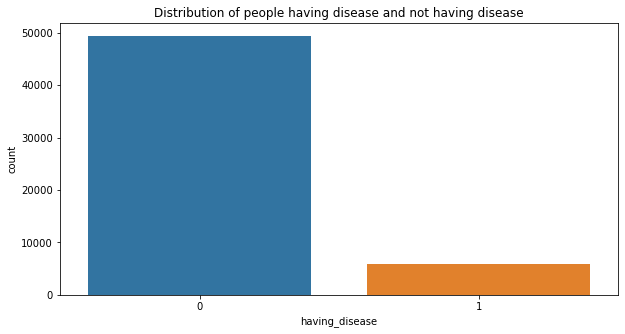

In [87]:
plt.figure(figsize=(10,5))#get age destribution pattern
plt.title('Distribution of people having disease and not having disease')
sns.countplot(x="having_disease",data=df_merged)

In [88]:
df_merged.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease
SEQN,,,,,,,,,,,,,,,,,,,,,,,
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,not given,No,24.0,144.1,203.0,100.666667,56.666667,0
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667,0
7,59.0,Non-Hispanic Black,NaN,Female,1999-2000,58.0,78.0,162.9,90.7,31.7,No,No,No,No,No,Not at all,No,NaN,143.2,244.0,125.333333,80.000000,0
10,43.0,Non-Hispanic Black,NaN,Male,1999-2000,58.0,111.8,190.1,108.0,37.6,No,No,No,No,No,Every day,No,6.0,140.9,135.0,145.333333,96.000000,0
12,37.0,Non-Hispanic White,4.93,Male,1999-2000,64.0,99.2,180.0,112.8,37.2,No,No,No,No,No,not given,No,2.0,141.3,151.0,176.666667,102.000000,0


In [89]:
df_merged.groupby('having_disease').size()

having_disease
0    49388
1     5889
dtype: int64

In [90]:
#df_merged['Age in years at screening '] = df_merged['Age in years at screening '].astype('int64')


In [91]:
df_merged.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease
SEQN,,,,,,,,,,,,,,,,,,,,,,,
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,not given,No,24.0,144.1,203.0,100.666667,56.666667,0
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667,0
7,59.0,Non-Hispanic Black,NaN,Female,1999-2000,58.0,78.0,162.9,90.7,31.7,No,No,No,No,No,Not at all,No,NaN,143.2,244.0,125.333333,80.000000,0
10,43.0,Non-Hispanic Black,NaN,Male,1999-2000,58.0,111.8,190.1,108.0,37.6,No,No,No,No,No,Every day,No,6.0,140.9,135.0,145.333333,96.000000,0
12,37.0,Non-Hispanic White,4.93,Male,1999-2000,64.0,99.2,180.0,112.8,37.2,No,No,No,No,No,not given,No,2.0,141.3,151.0,176.666667,102.000000,0


In [92]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55277 entries, 2 to 102956
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age in years at screening                 55277 non-null  float64
 1   Race/Hispanic origin                      55277 non-null  object 
 2   Ratio of family income to poverty         49990 non-null  float64
 3   Gender                                    55277 non-null  object 
 4   year                                      55277 non-null  object 
 5   60 sec. pulse (30 sec. pulse * 2)         50484 non-null  float64
 6   Weight (kg)                               51754 non-null  float64
 7   Standing Height (cm)                      51798 non-null  float64
 8   Waist Circumference (cm)                  49601 non-null  float64
 9   Arm Circumference (cm)                    50189 non-null  float64
 10  Ever told had congestive heart fa

In [93]:
df_merged.isnull().sum()

Age in years at screening                       0
Race/Hispanic origin                            0
Ratio of family income to poverty            5287
Gender                                          0
year                                            0
60 sec. pulse (30 sec. pulse * 2)            4793
Weight (kg)                                  3523
Standing Height (cm)                         3479
Waist Circumference (cm)                     5676
Arm Circumference (cm)                       5088
Ever told had congestive heart failure          0
Ever told you had coronary heart disease        0
Ever told you had angina/angina pectoris        0
Ever told you had heart attack                  0
Ever told you had a stroke                      0
Do you now smoke cigarettes?                    0
Doctor told you have diabetes                   0
How often drink alcohol over past 12 mos    18712
Sodium (mmol/L)                              6469
Cholesterol, refrigerated serum (mg/dL)      6473


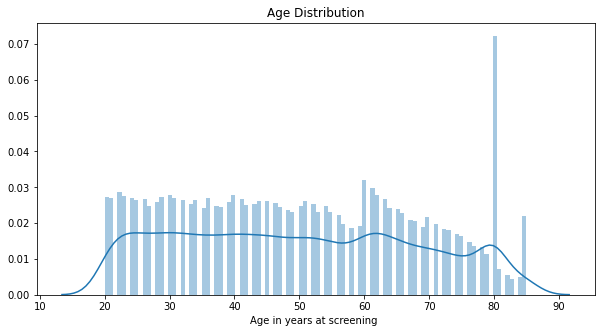

In [94]:
plt.figure(figsize=(10,5))#get age destribution pattern
plt.title('Age Distribution')
sns.distplot(df_merged["Age in years at screening "], bins =100)

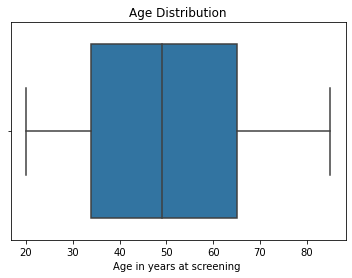

In [95]:
plt.title('Age Distribution')
sns.boxplot(x=df_merged['Age in years at screening '])

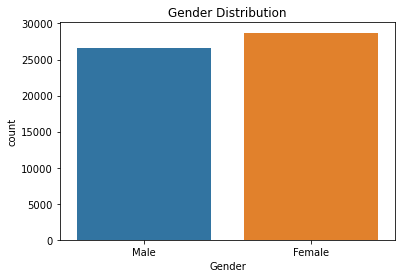

In [96]:
plt.title('Gender Distribution')
sns.countplot(x="Gender",data=df_merged)

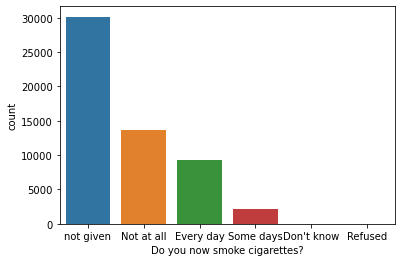

In [97]:
sns.countplot(x="Do you now smoke cigarettes?",data=df_merged)

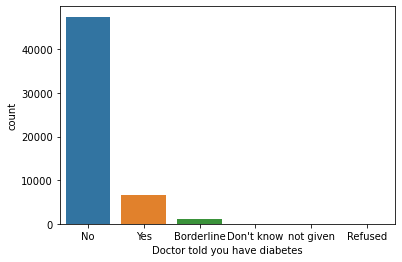

In [98]:
sns.countplot(x="Doctor told you have diabetes",data=df_merged)

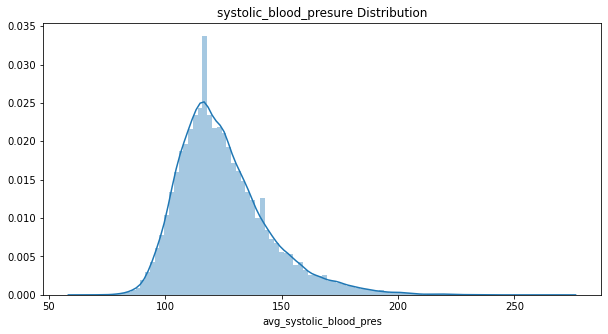

In [99]:
plt.figure(figsize=(10,5))#get blood presure destribution pattern
plt.title('systolic_blood_presure Distribution')
sns.distplot(df_merged["avg_systolic_blood_pres"], bins =100)

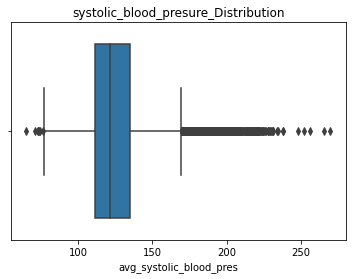

In [100]:
plt.title('systolic_blood_presure_Distribution')
sns.boxplot(x=df_merged['avg_systolic_blood_pres'])

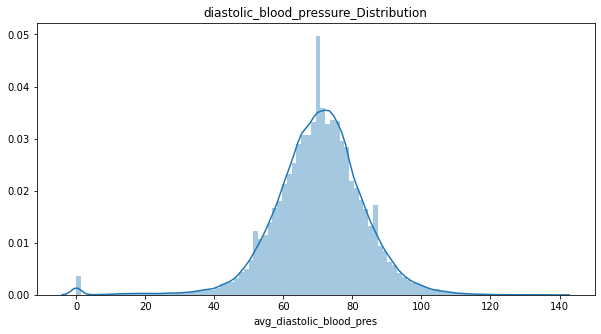

In [101]:
plt.figure(figsize=(10,5))#get blood presure destribution pattern
plt.title('diastolic_blood_pressure_Distribution')
sns.distplot(df_merged["avg_diastolic_blood_pres"], bins =100)

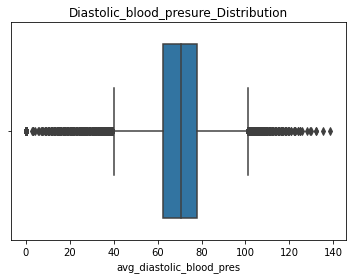

In [102]:
plt.title('Diastolic_blood_presure_Distribution')
sns.boxplot(x=df_merged['avg_diastolic_blood_pres'])

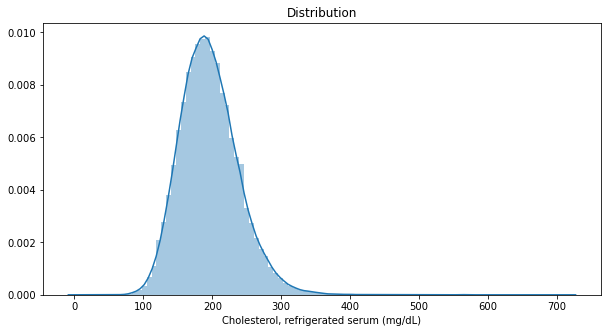

In [103]:
plt.figure(figsize=(10,5))#get blood presure destribution pattern
plt.title('Distribution')
sns.distplot(df_merged["Cholesterol, refrigerated serum (mg/dL)"], bins =100)

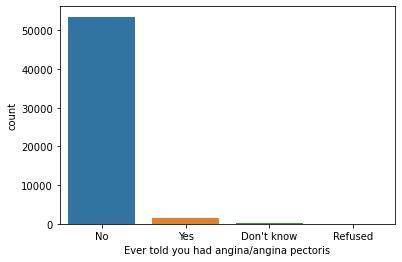

In [104]:
sns.countplot(x="Ever told you had angina/angina pectoris",data=df_merged)

In [105]:
df_merged['BMI'] = df_merged['Weight (kg)']/((df_merged['Standing Height (cm)']/100)*(df_merged['Standing Height (cm)']/100))


In [106]:
df_merged.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease,BMI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,not given,No,24.0,144.1,203.0,100.666667,56.666667,0,24.904215
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667,0,29.096386
7,59.0,Non-Hispanic Black,NaN,Female,1999-2000,58.0,78.0,162.9,90.7,31.7,No,No,No,No,No,Not at all,No,NaN,143.2,244.0,125.333333,80.000000,0,29.393577
10,43.0,Non-Hispanic Black,NaN,Male,1999-2000,58.0,111.8,190.1,108.0,37.6,No,No,No,No,No,Every day,No,6.0,140.9,135.0,145.333333,96.000000,0,30.936955
12,37.0,Non-Hispanic White,4.93,Male,1999-2000,64.0,99.2,180.0,112.8,37.2,No,No,No,No,No,not given,No,2.0,141.3,151.0,176.666667,102.000000,0,30.617284


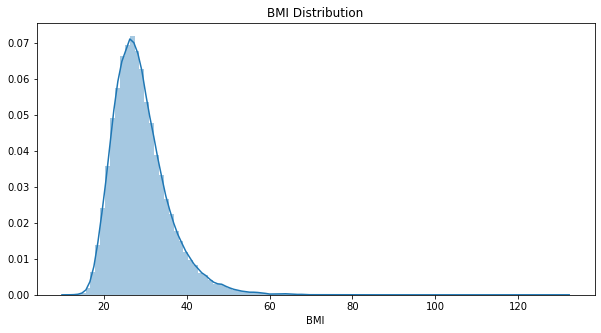

In [107]:
plt.figure(figsize=(10,5))#get blood presure destribution pattern
plt.title('BMI Distribution')
sns.distplot(df_merged["BMI"], bins =100)

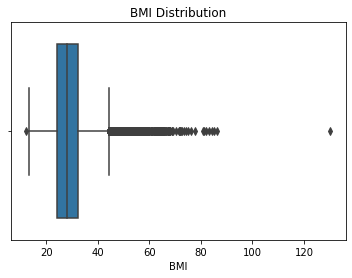

In [108]:
plt.title('BMI Distribution')
sns.boxplot(x=df_merged['BMI'])

In [110]:

for cols in df_merged.select_dtypes(exclude=np.number).columns:
    print(cols, ':', df_merged[cols].unique(), end='\n\n')

Race/Hispanic origin : ['Non-Hispanic White' 'Non-Hispanic Black' 'Mexican American'
 'Other Hispanic' 'Other Race - Including Multi-Racial']

Gender : ['Male' 'Female']

year : ['1999-2000' '2001-2002' '2003-2004' '2005-2006' '2007-2008' '2009-2010'
 '2011-2012' '2013-2014' '2015-2016' '2017-2018']

Ever told had congestive heart failure : ['No' 'Yes' "Don't know"]

Ever told you had coronary heart disease : ['No' 'Yes' "Don't know" 'Refused']

Ever told you had angina/angina pectoris : ['No' 'Yes' "Don't know" 'Refused']

Ever told you had heart attack : ['No' 'Yes' "Don't know" 'Refused']

Ever told you had a stroke : ['No' 'Yes' "Don't know"]

Do you now smoke cigarettes? : ['not given' 'Not at all' 'Every day' 'Some days' "Don't know" 'Refused']

Doctor told you have diabetes : ['No' 'Yes' 'Borderline' "Don't know" 'not given' 'Refused']



In [111]:
len(df_merged)

55277

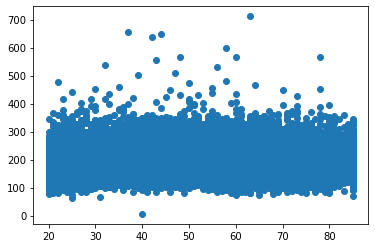

In [112]:
plt.scatter(df_merged["Age in years at screening "],df_merged["Cholesterol, refrigerated serum (mg/dL)"])

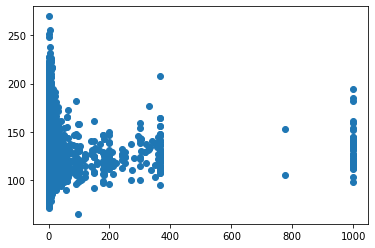

In [113]:
plt.scatter(df_merged["How often drink alcohol over past 12 mos"],df_merged["avg_systolic_blood_pres"])

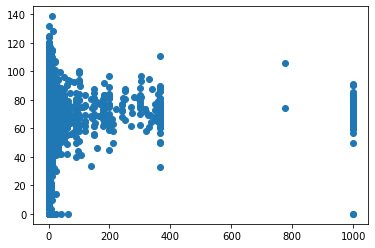

In [114]:
plt.scatter(df_merged["How often drink alcohol over past 12 mos"],df_merged["avg_diastolic_blood_pres"])

In [115]:
from sklearn.model_selection import train_test_split#splitting train and test data
train, test = train_test_split(df_merged, test_size = 0.2,random_state = seed)

In [116]:
len(train.columns)

24

In [117]:
train.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease,BMI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,
5588,21.0,Mexican American,2.40,Female,1999-2000,88.0,84.9,168.2,100.0,33.5,No,No,No,No,No,Not at all,No,3.000000e+00,133.8,215.0,120.000000,63.333333,0,30.009289
48821,51.0,Mexican American,0.97,Female,2007-2008,108.0,112.6,165.2,129.6,40.8,No,No,No,No,No,Not at all,No,5.397605e-79,135.0,179.0,120.666667,62.000000,0,41.258963
76109,36.0,Other Race - Including Multi-Racial,2.12,Male,2013-2014,56.0,222.6,181.0,NaN,57.2,No,No,No,No,No,not given,Borderline,5.397605e-79,139.0,232.0,132.000000,78.666667,0,67.946644
71223,25.0,Non-Hispanic Black,0.82,Female,2011-2012,68.0,62.4,170.5,NaN,NaN,No,No,No,No,No,not given,No,NaN,135.0,176.0,118.666667,53.333333,0,21.465244
101360,46.0,Non-Hispanic White,1.93,Male,2017-2018,74.0,85.5,171.5,99.1,32.4,No,No,No,No,No,not given,No,NaN,144.0,196.0,143.333333,98.000000,0,29.069520


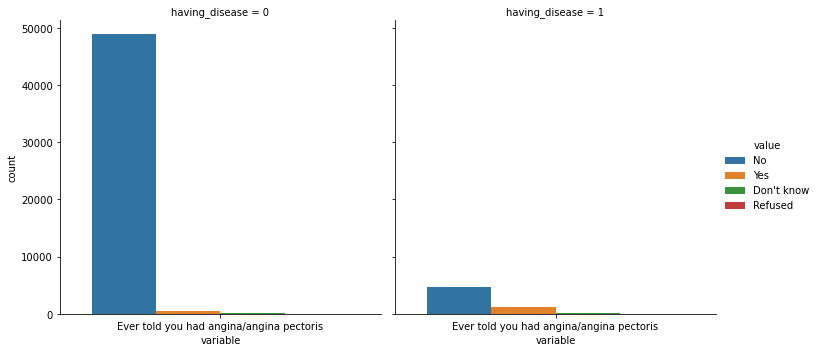

In [118]:
df_long = pd.melt(df_merged, id_vars=['having_disease'], value_vars=['Ever told you had angina/angina pectoris'])
sns.catplot(x="variable", hue="value", col="having_disease",
                data=df_long, kind="count");

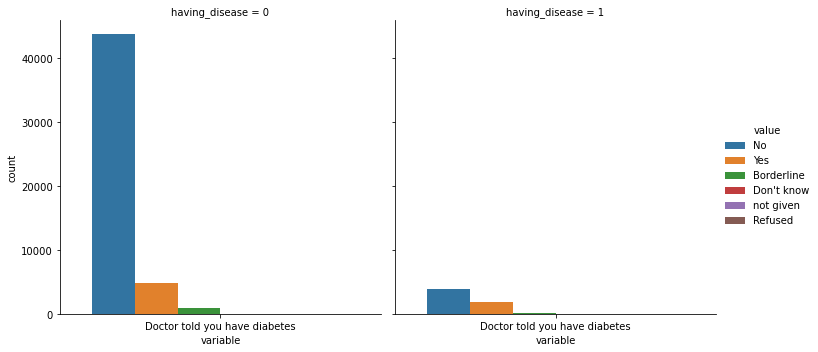

In [119]:
df_long = pd.melt(df_merged, id_vars=['having_disease'], value_vars=['Doctor told you have diabetes'])
sns.catplot(x="variable", hue="value", col="having_disease",
                data=df_long, kind="count");


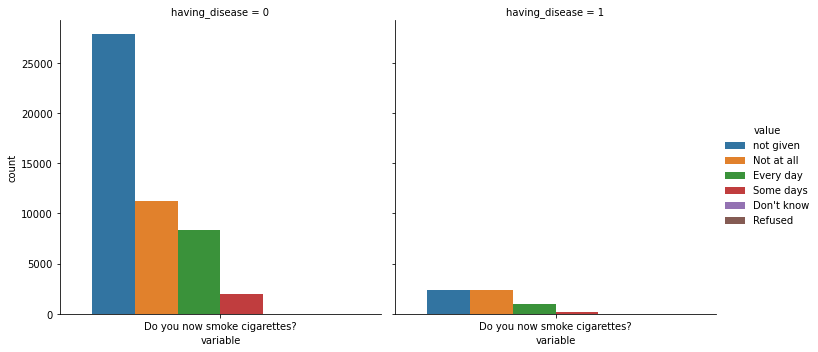

In [120]:
df_long = pd.melt(df_merged, id_vars=['having_disease'], value_vars=['Do you now smoke cigarettes?'])
sns.catplot(x="variable", hue="value", col="having_disease",
                data=df_long, kind="count");

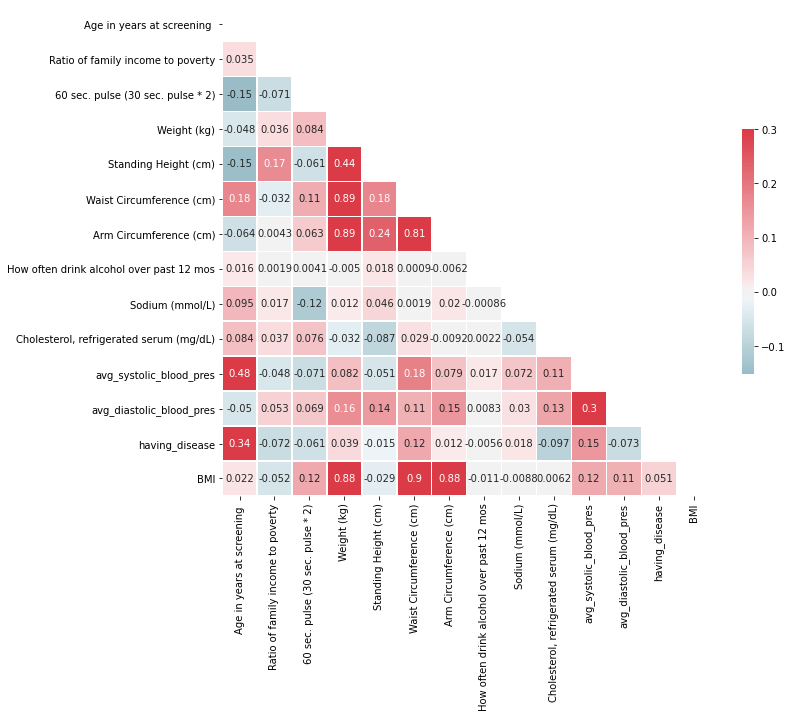

In [121]:
corr = df_merged.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

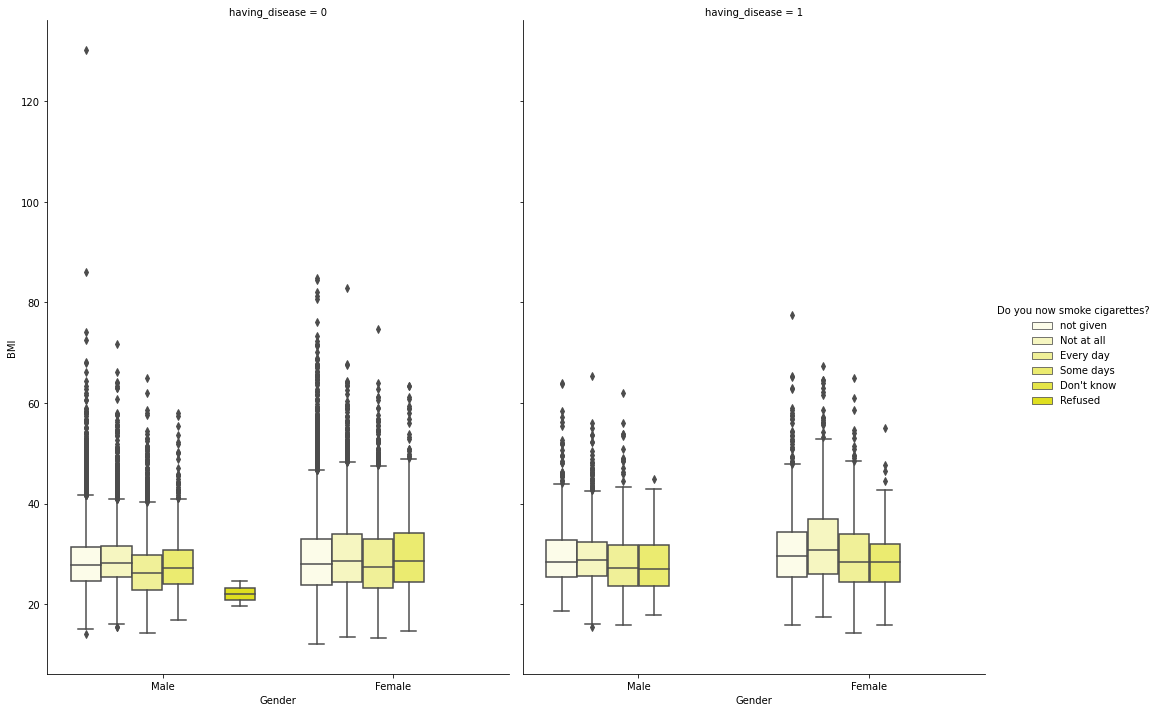

In [122]:
sns.catplot(x="Gender", y="BMI", hue="Do you now smoke cigarettes?", col="having_disease", data=df_merged, color = "yellow",kind="box", height=10, aspect=.7);

In [123]:
len(test.columns)

24

In [124]:
test.head()

,Age in years at screening,Race/Hispanic origin,Ratio of family income to poverty,Gender,year,60 sec. pulse (30 sec. pulse * 2),Weight (kg),Standing Height (cm),Waist Circumference (cm),Arm Circumference (cm),Ever told had congestive heart failure,Ever told you had coronary heart disease,Ever told you had angina/angina pectoris,Ever told you had heart attack,Ever told you had a stroke,Do you now smoke cigarettes?,Doctor told you have diabetes,How often drink alcohol over past 12 mos,Sodium (mmol/L),"Cholesterol, refrigerated serum (mg/dL)",avg_systolic_blood_pres,avg_diastolic_blood_pres,having_disease,BMI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,
14900,25.0,Other Hispanic,1.21,Female,2001-2002,70.0,77.8,153.4,93.8,36.5,No,No,No,No,No,not given,No,NaN,NaN,NaN,104.666667,68.666667,0,33.061981
28413,25.0,Non-Hispanic White,5.00,Male,2003-2004,58.0,86.5,189.3,91.5,37.0,No,No,No,No,No,not given,No,1.000000e+00,140.0,236.0,102.000000,66.000000,0,24.138756
102445,80.0,Mexican American,1.03,Female,2017-2018,70.0,56.2,153.5,100.8,24.5,No,No,No,No,No,Not at all,No,NaN,142.0,146.0,138.000000,50.000000,0,23.851712
54303,56.0,Non-Hispanic White,0.57,Female,2009-2010,68.0,68.4,178.1,84.9,27.8,No,No,No,No,No,not given,No,2.000000e+00,141.0,178.0,124.666667,62.666667,0,21.563947
77663,61.0,Other Race - Including Multi-Racial,2.20,Male,2013-2014,54.0,71.0,157.7,102.3,29.7,No,No,No,No,No,Not at all,No,5.397605e-79,141.0,225.0,152.000000,80.000000,0,28.549267


In [125]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())])
cat_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                         ("onehot", OneHotEncoder())])

In [126]:
col_transform = ColumnTransformer([("num", num_pipeline, ["avg_systolic_blood_pres", "Cholesterol, refrigerated serum (mg/dL)","Ratio of family income to poverty","60 sec. pulse (30 sec. pulse * 2)","How often drink alcohol over past 12 mos","Sodium (mmol/L)","avg_diastolic_blood_pres"]),
                                   ("cat", cat_pipeline, ["Race/Hispanic origin", "Gender","Ever told you had angina/angina pectoris","Do you now smoke cigarettes?","Doctor told you have diabetes"])])

In [128]:
X_train = col_transform.fit_transform(train.drop("having_disease", axis=1))
X_test = col_transform.transform(test.drop("having_disease", axis=1))
#X_test = col_transform.transform(test)

y_train = train["having_disease"]
y_test = test["having_disease"]


In [129]:
start = datetime.now()
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


baseline_model = DecisionTreeClassifier(random_state=seed)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)
DT_scores = cross_val_score(baseline_model,X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

baseline_model = RandomForestClassifier(random_state=seed)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)
RF_scores = cross_val_score(baseline_model,X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

baseline_model = KNeighborsClassifier(n_neighbors=5)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)
KNN_scores = cross_val_score(baseline_model,X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

baseline_model = LogisticRegression(random_state=seed)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)
Logistic_scores = cross_val_score(baseline_model,X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)



print('DecisionTree score: %.4f' % mean(DT_scores))
print('RandomForest score: %.4f' % mean(RF_scores))
print('KNN average score: %.4f' % mean(KNN_scores))
print('Logistic score: %.4f' % mean(Logistic_scores))

print(datetime.now()-start)

DecisionTree score: 0.6050
RandomForest score: 0.7912
KNN average score: 0.6916
Logistic score: 0.7994
0:00:51.792410


In [130]:
#train_features = train.drop(["having_disease"], axis=1)
#y_train = train["having_disease"].copy()

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import roc_auc_score

In [132]:
start = datetime.now()
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

model = DecisionTreeClassifier(random_state=0)

over = SMOTE(sampling_strategy=0.3, random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
steps = [('over', over), ('under', under), ('model', model)]
pipe = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

scores = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.4f' % mean(scores))

Mean ROC AUC: 0.6322


In [133]:
start = datetime.now()
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


over = SMOTE(sampling_strategy=0.3,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
steps = [('over', over), ('under', under),("scaler", MinMaxScaler()),("classifier", KNeighborsClassifier())]
pipeline_kNN = Pipeline(steps=steps)

parameters_grid_kNN = {'classifier__n_neighbors': range(1,6)}

grid_cv_kNN = GridSearchCV(pipeline_kNN, parameters_grid_kNN, scoring = 'roc_auc', n_jobs=-1, return_train_score=True,
                                                  cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1, random_state=seed ))


grid_cv_kNN.fit(X_train, y_train)

print(datetime.now()-start)

0:04:06.459479


In [134]:
print('k-NN optimal parameters: ', grid_cv_kNN.best_params_)

k-NN optimal parameters:  {'classifier__n_neighbors': 5}


In [135]:
print('k-NN train AUC: ',roc_auc_score(y_train, grid_cv_kNN.predict_proba(X_train)[:,1]))
print('k-NN test AUC: ', roc_auc_score(y_test, grid_cv_kNN.predict_proba(X_test)[:,1]))

k-NN train AUC:  0.9051087891766985
k-NN test AUC:  0.7388651798541053


In [136]:
start = datetime.now()
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.3,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
steps = [('over', over), ('under', under),("scaler", MinMaxScaler()),("classifier", LogisticRegression())]
pipeline_logistic = Pipeline(steps=steps)

parameters_grid_logistic = {'classifier__penalty' : ['l1', 'l2'],
                            'classifier__C' : np.logspace(-4, 4, 20)}

grid_cv_logistic = GridSearchCV(pipeline_logistic, parameters_grid_logistic, scoring = 'roc_auc', n_jobs=-1, return_train_score=True,
                                 cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1, random_state=seed ))


grid_cv_logistic.fit(X_train, y_train)

print(datetime.now()-start)

0:01:16.144358


C:\Users\poorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
print('logistic optimal parameters: ', grid_cv_logistic.best_params_)

logistic optimal parameters:  {'classifier__C': 206.913808111479, 'classifier__penalty': 'l2'}


In [138]:
print('logistic train AUC: ', roc_auc_score(y_train, grid_cv_logistic.predict_proba(X_train)[:,1]))
print('logistic test AUC: ', roc_auc_score(y_test, grid_cv_logistic.predict_proba(X_test)[:,1]))

logistic train AUC:  0.8001116357096192
logistic test AUC:  0.8064878478641619


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [141]:
def get_stacking():
    # define the base models
    level0 =list()
    level0.append(('Logistic Regression', LogisticRegression()))
    level0.append(('k-NN', KNeighborsClassifier()))
    level0.append(('Decision Tree', DecisionTreeClassifier()))
    
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [142]:
def get_models():
    models = dict()
    models['Logistic Regression'] = LogisticRegression()
    models['k-NN'] = KNeighborsClassifier()
    models['Decision Tree'] = DecisionTreeClassifier()
    models['Stacking'] = get_stacking()
    return models

In [143]:
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [144]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('%s: %.4f (%.4f)' % (name, np.mean(scores), np.std(scores)))

Logistic Regression: 0.7994 (0.0087)
k-NN: 0.6904 (0.0088)
Decision Tree: 0.6111 (0.0047)
Stacking: 0.8004 (0.0091)


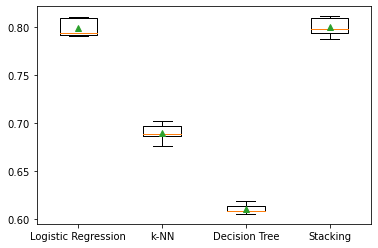

In [145]:
plt.boxplot(results, labels=names, showmeans=True)
plt.gcf().savefig('stackingclf.pdf', bbox_inches='tight');

In [146]:
estimators = [
    ('logistic',grid_cv_logistic.best_estimator_ ),
    ('K-NN',grid_cv_kNN.best_estimator_)]     

In [147]:
#estimators = [
    #('KNN', KNeighborsClassifier(n_neighbors=5)),
    #('logistic',LogisticRegression(penalty='l2',C=0.6))]                                                                     

In [148]:
#estimators = [
    #('logistic',grid_cv_logistic),
    #('K-NN',grid_cv_kNN)]     

In [149]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

In [150]:
for clf in estimators:
    scores = cross_val_score(clf[1], X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('%s: %.4f (%.4f)' % (clf[0], np.mean(scores), np.std(scores)))

logistic: 0.7989 (0.0094)
K-NN: 0.7239 (0.0082)


In [151]:
clf = StackingClassifier(estimators=estimators,
                         final_estimator=LogisticRegression(random_state=42))
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('%s: %.4f (%.4f)' % (name, np.mean(scores), np.std(scores)))

Stacking: 0.8001 (0.0085)


In [152]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(clf,X_train,y_train,cv=5)
print(y_pred)

C:\Users\poorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\poorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0 0 0 ... 0 0 0]


In [153]:
#test_features = test.drop(["having_disease"], axis=1)
#y_test = test["having_disease"].copy()

In [154]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

recall_score(y_train,y_pred)
precision_score(y_train,y_pred)
f1_score(y_train,y_pred)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     39481
           1       0.65      0.24      0.35      4740

    accuracy                           0.90     44221
   macro avg       0.78      0.61      0.65     44221
weighted avg       0.89      0.90      0.88     44221

